In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('dataset/')

['cifar.zip', 'MNIST', 'mnist_png', 'mnist_png.zip']

# 데이터 분석 (MNIST)

In [3]:
os.listdir('dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
os.listdir('dataset/mnist_png/training/0/')[0]

'1.png'

In [5]:
data_paths = glob('dataset/mnist_png/training/*/*.png')
data_paths[0]

'dataset/mnist_png/training\\0\\1.png'

Label 0의 데이터 갯수 확인

In [6]:
len(os.listdir('dataset/mnist_png/training/'+'0'))

5923

### 데이터 별 갯수 비교

In [7]:
label_nums = os.listdir('dataset/mnist_png/training')
nums_dataset = []
for libl_n in label_nums:
    data_per_class = os.listdir('dataset/mnist_png/training/' + libl_n)
    nums_dataset.append(len(data_per_class))

In [8]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [9]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

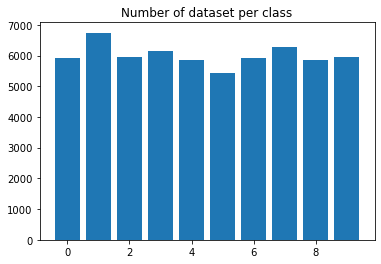

In [14]:
plt.bar(list(range(10)), nums_dataset)
plt.title('Number of dataset per class')
plt.show()

# Pillow로 열기

In [11]:
image_pil = Image.open(data_paths[0])
print(type(image_pil))
image = np.array(image_pil)
print(type(image))

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


In [12]:
image.shape

(28, 28)

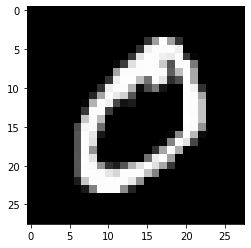

In [13]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [15]:
gfile = tf.io.read_file(data_paths[0])
print(type(gfile))
image = tf.io.decode_image(gfile)
print(type(image))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [16]:
image.shape

TensorShape([28, 28, 1])

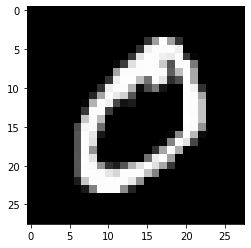

In [18]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Label 얻기

In [19]:
data_paths[0]

'dataset/mnist_png/training\\0\\1.png'

In [20]:
data_paths[0].split('\\')

['dataset/mnist_png/training', '0', '1.png']

In [22]:
cls_n = data_paths[0].split('\\')[-2]
print(cls_n)
print(type(cls_n))

0
<class 'str'>


In [23]:
int(cls_n)

0

In [24]:
def get_label(path):
    cls_n = path.split('\\')[-2]
    return int(cls_n)

In [29]:
lbl = get_label(data_paths[50000])
lbl

8

# 데이터 이미지 사이즈 알기

In [30]:
!conda list tqdm

# packages in environment at C:\Users\admin\anaconda3:
#
# Name                    Version                   Build  Channel
tqdm                      4.62.0             pyhd3eb1b0_1  


In [31]:
from tqdm import tqdm_notebook

In [33]:
heights = []
widths = []
for path in tqdm_notebook(data_paths):
    image_pil = Image.open(path)
    image = np.array(image_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-33-ce30bb36a69b>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(data_paths):


  0%|          | 0/60000 [00:00<?, ?it/s]

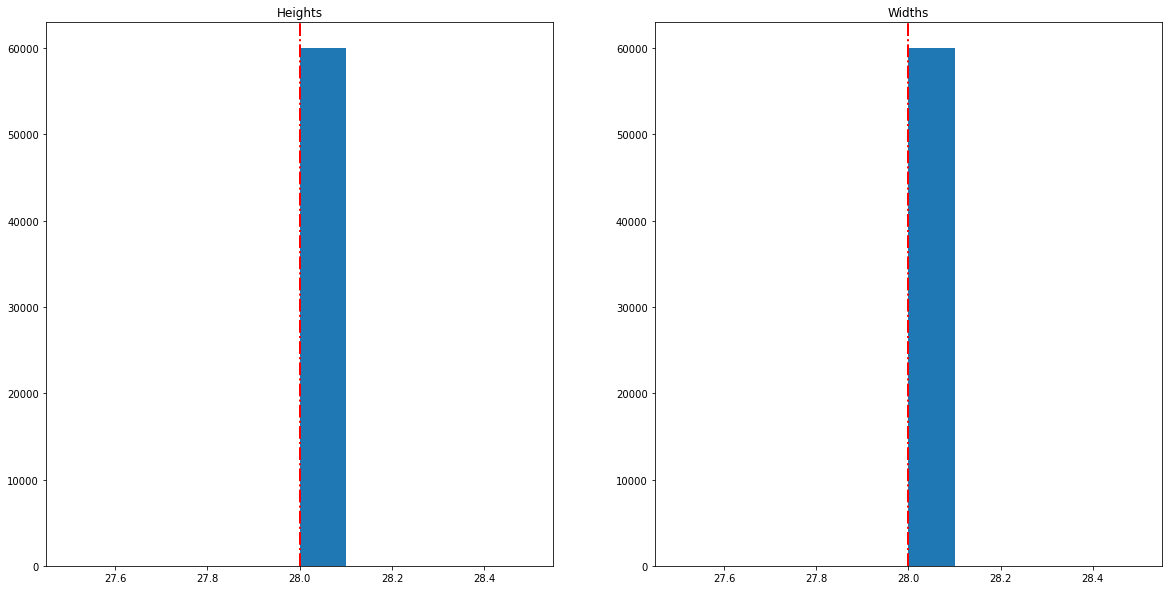

In [34]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='-.', linewidth=2)
plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='-.', linewidth=2)